In [7]:
from importlib import reload
import datasets


In [22]:
rwth_phoenix = datasets.load_dataset('lukasbraach/rwth_phoenix_weather_2014', 'multisigner', streaming=True)
it = iter(rwth_phoenix['train'])
first = next(it)

In [11]:
first['frames']

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=210x260>,
 <PIL.PngImagePlugin.PngImageFile image 

In [23]:
import src.models.components.feature_extractor_dinov2

reload(src.models.components.feature_extractor_dinov2)
from src.models.components.feature_extractor_dinov2 import SignLanguageFeatureExtractor

feature_extractor = SignLanguageFeatureExtractor()
feature = feature_extractor(first['frames'], sampling_rate=25, return_attention_mask=True, return_tensors='pt')

feature['input_values'].shape

torch.Size([1, 176, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


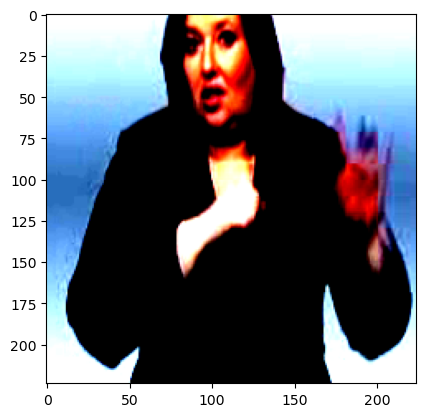

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(feature['input_values'][0, 38].permute(1, 2, 0))
plt.show()
